In [9]:
!pip install Pillow==4.1.1
!pip install -U image
!pip install opencv-python


from io import BytesIO
from IPython.display import clear_output, Image, display
import numpy as np
import PIL.Image
from __future__ import print_function
import cv2

fastai 1.0.58 requires nvidia-ml-py3, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already up-to-date: image in /home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages (1.5.27)
Requirement not upgraded as not directly required: pillow in /home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages (from image) (4.1.1)
Requirement not upgraded as not directly required: django in /home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages (from image) (2.2.7)
Requirement not upgraded as not directly required: olefile in /home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages (from pillow->image) (0.45.1)
Requirement not upgraded as not directly required: sqlparse in /home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages (from django->image) (0.3.0)
Requirement not upgraded as not directly required: pyt

In [10]:
!pip install torch
!pip install torchvision

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.hub

from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag

fastai 1.0.58 requires nvidia-ml-py3, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
fastai 1.0.58 requires nvidia-ml-py3, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
##### Type 2: CNN with images.
# To-Do: Use GPU...
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # To-Do: need to have more channels for higher accuracy. 
        self.conv1 = nn.Conv2d(in_channels=4, out_channels=5, kernel_size=4, padding=2)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=4)
        # Question: Why is this 48*48 correct? bc 97//2 = 48
        self.fc1 = nn.Linear(in_features=10 * 48 * 48, out_features=80)
        self.fc2 = nn.Linear(in_features=80, out_features=K)
        self.relu = F.relu
        self.pool = F.max_pool2d
        self.softmax = nn.Softmax(dim=1)
    def forward(self, x, break_early=False):
        out = self.relu(self.conv1(x))
        out = self.pool(out, 2)
        out = self.relu(self.conv2(out))
        
        out = self.pool(out, 2)
        if break_early:
            return out
        out = out.reshape(out.size(0), -1)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        
        out = self.softmax(out)
        return out
# ##### Type 2: CNN with images.
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         # To-Do: need to have more channels for higher accuracy. 
#         self.conv1 = nn.Conv2d(in_channels=4, out_channels=5, kernel_size=4, padding=2)
#         self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=4)
#         # Question: Why is this 48*48 correct? bc 97//2 = 48
#         self.fc1 = nn.Linear(in_features=10 * 48 * 48, out_features=80)
#         self.fc2 = nn.Linear(in_features=80, out_features=K)
#         self.relu = F.relu
#         self.pool = F.max_pool2d
#         self.softmax = nn.Softmax(dim=1)
#     def forward(self, x, break_early = False):
#         out = self.relu(self.conv1(x))
#         out = self.pool(out, 2)
#         out = self.relu(self.conv2(out))
#         out = self.pool(out, 2)
#         if break_early:
#             return out
#         out = out.reshape(out.size(0), -1)
#         out = self.relu(self.fc1(out))
        
#         out = self.fc2(out)
#         out = self.softmax(out)
#         return out

In [12]:
x_dim = 7
K = 4
cnn_net = CNN()
cnn_net.load_state_dict(torch.load("data/cnn_net_ADAM_2conv"))
cnn_net.eval()

CNN(
  (conv1): Conv2d(4, 5, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(5, 10, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=23040, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=4, bias=True)
  (softmax): Softmax(dim=1)
)

In [13]:
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [14]:
print(cnn_net.conv1.weight.data.size()) # Access convolutional filters

torch.Size([5, 4, 4, 4])


In [15]:
def visualize_filters(conv_w,output_size = None):
    #TODO: Normalize conv_w values to 0-1 range  
    w_normalized = (conv_w - conv_w.min()) / (conv_w.max() - conv_w.min())
    map_t = 255 * w_normalized
    map_t = map_t.numpy()
    map_t = map_t.astype(np.uint8)
    if output_size is not None:
        map_t = cv2.resize(map_t,(output_size,output_size))
    return map_t

Visualizing conv1 filter 0


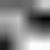

Visualizing conv1 filter 1


Visualizing conv1 filter 2


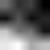

Visualizing conv1 filter 3


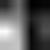

Visualizing conv1 filter 4


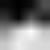

Visualizing conv1 filter 5


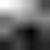

Visualizing conv1 filter 6


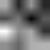

Visualizing conv1 filter 7


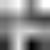

Visualizing conv1 filter 8


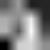

Visualizing conv1 filter 9


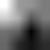

In [17]:
for i in range(10):
  print('Visualizing conv1 filter',i)
  vis = visualize_filters(cnn_net.conv2.weight.data[i,0,:,:],50)
  showarray(vis)

In [18]:
def generate_featuremap_unit(net,unit_id,im_input):
    #Extract activation from model
    #TODO: remove the last 2 layers of resnet 
    #model_cut  = nn.Sequential(*list(net.children())[:-2])
    
    # Mark the model as being used for inference
    net.eval()
    
    #model_cut.eval()
    # Crop the image
    im = (im_input)
    # Place the image into a batch of size 1, and use the model to get an intermediate representation
    out = net(im,True)
    # Print the shape of our representation
    print(out.size())
    # Extract the only result from this batch, and take just the `unit_id`th channel
    out_final = out.squeeze()[unit_id]
    # Return this channel
    return out_final

In [19]:
def visualize_featuremap(im_input,feature_map,alpha=0.3):
    feature_imgs = []
    print(im_input.shape[0])
    copy = np.copy(im_input)
    for ith_img in range(0,im_input.shape[0]):
        res = copy[ith_img]
        #stack to convert bw to rgb
        res = np.stack((res,)*3, axis=-1)
        # Normalize to [0..1], with a little leeway (0.9999) in case feature_map has 0 range
        feature_map = feature_map/(feature_map.max()+1e-10)
        # Convert to numpy (detach() just seperates a tensor from the gradient)
        feat_numpy = feature_map.detach().numpy()
        # Resize the feature map to our original image size (our strided conv layers reduce the size of the image)
        feat_numpy = cv2.resize(feat_numpy,(res.shape[1],res.shape[0]))
        # Invert to make the heatmap look more natural
        map_t = 1-feat_numpy
        # Add an extra dimension to make this a [H,W,C=1] image 
        feat_numpy = np.expand_dims(feat_numpy, axis=2)



        # Convert to image (UINT8 from 0-255)
        map_t = 255*map_t
        map_t = map_t.astype(np.uint8)
        # Use a color map to change this from BW to a nice color
        map_t = cv2.applyColorMap(map_t, cv2.COLORMAP_JET)
        # Combine the heatmap with the original image so you can see which section of the image is activated
        res = np.multiply((alpha*res + (1-alpha)*map_t), feat_numpy) + np.multiply(res, 1-feat_numpy)
        feature_imgs.append(res)
    # Return list of final visualizations
    return feature_imgs

In [20]:
x_train_images = np.load("data/x_train_images.npy")

In [36]:
print(x_train_images.shape)
#np for visualization later
sample_np = x_train_images[3]
#torch to run through cnn
sample_torch = torch.as_tensor(sample_np).float().unsqueeze(0)


(3556, 4, 200, 200)


In [37]:
feat = generate_featuremap_unit(cnn_net,1,sample_torch)

torch.Size([1, 10, 48, 48])


In [38]:
print(sample_np.shape)
list_of_visualizations = visualize_featuremap(sample_np,feat)

(4, 200, 200)
4


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


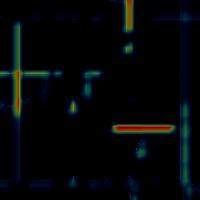

1


2


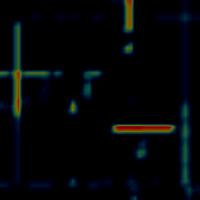

3


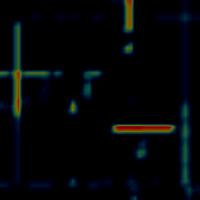

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


2


3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


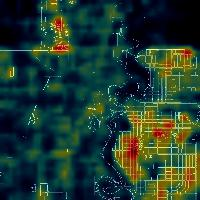

2


3


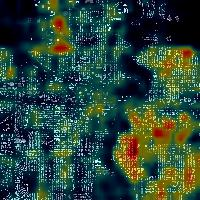

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


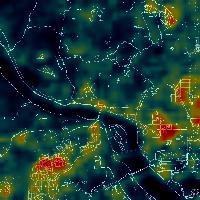

2


3


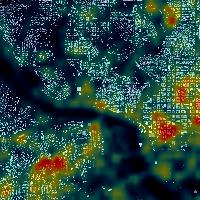

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


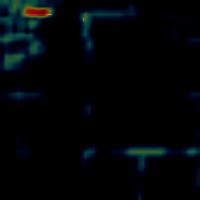

2


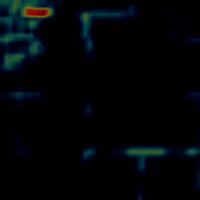

3


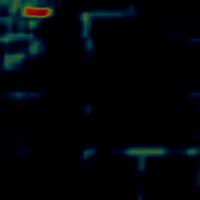

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


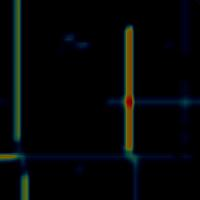

1


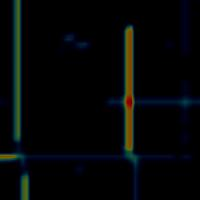

2


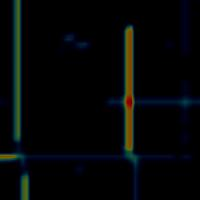

3


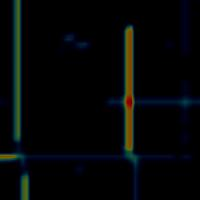

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


2


3


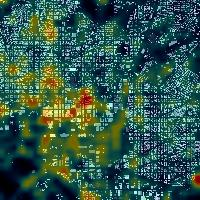

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


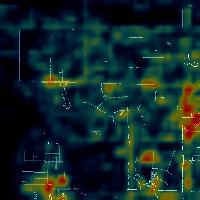

2


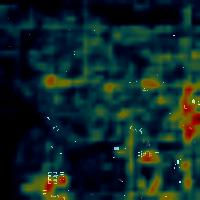

3


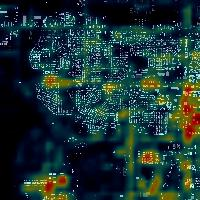

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


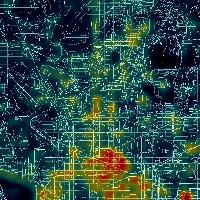

1


2


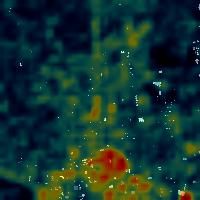

3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


2


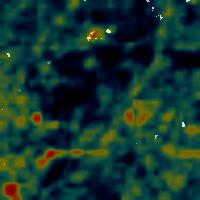

3


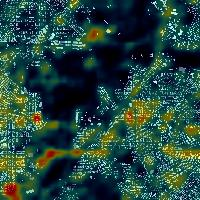

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


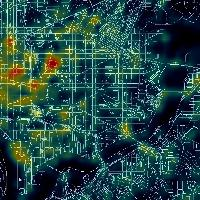

1


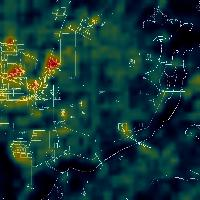

2


3


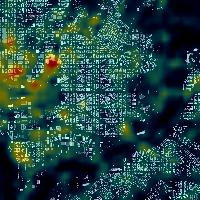

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


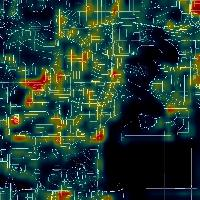

1


2


3


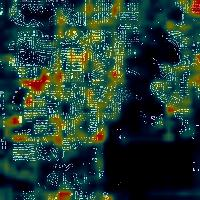

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


2


3


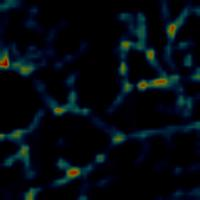

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


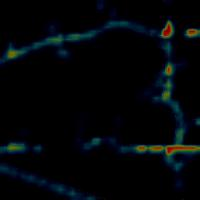

1


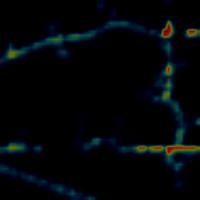

2


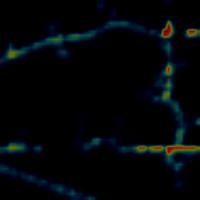

3


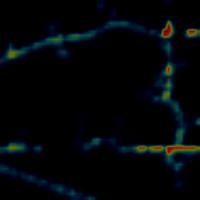

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


2


3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


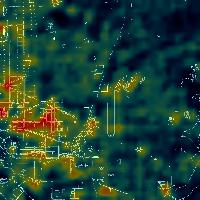

2


3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


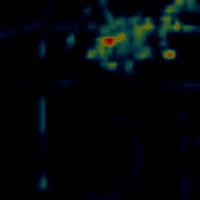

2


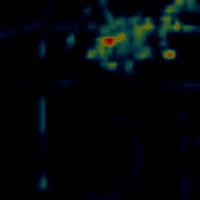

3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


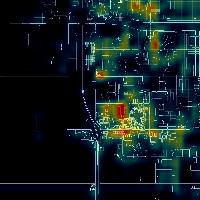

1


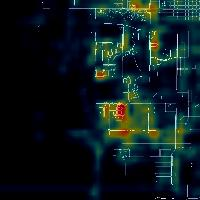

2


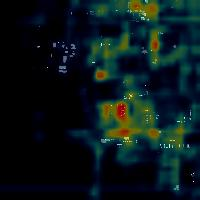

3


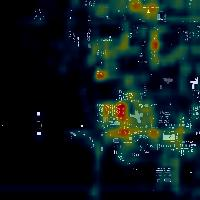

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


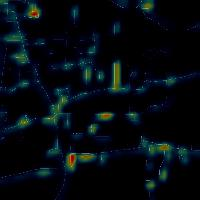

1


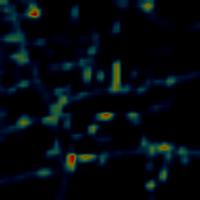

2


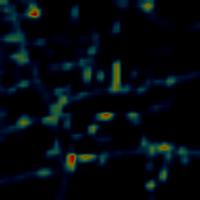

3


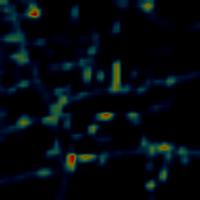

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


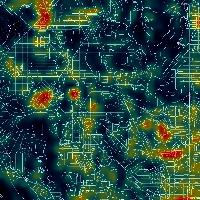

1


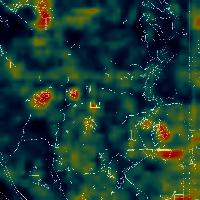

2


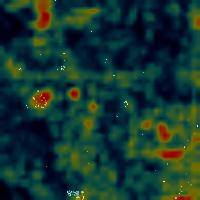

3


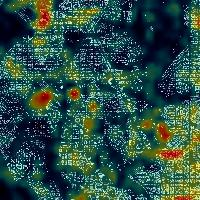

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


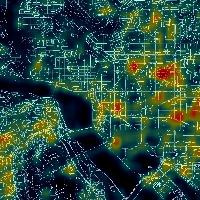

1


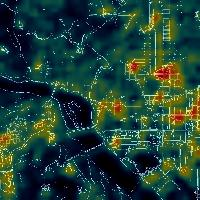

2


3


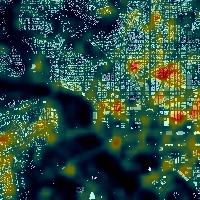

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


2


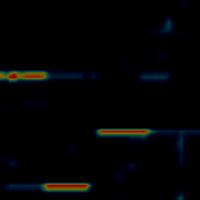

3


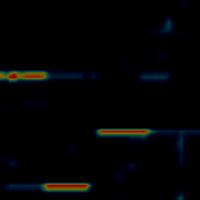

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


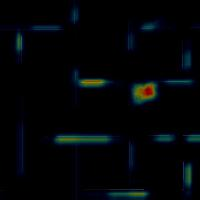

1


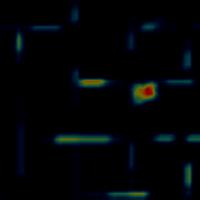

2


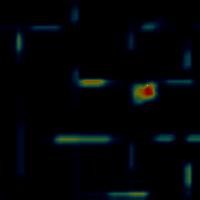

3


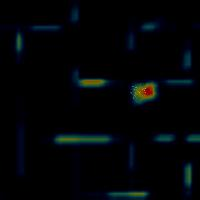

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


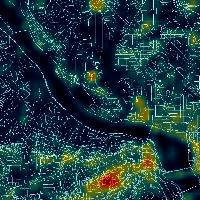

1


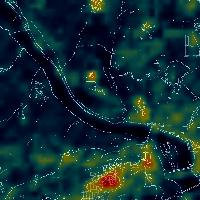

2


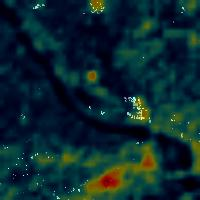

3


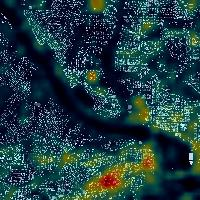

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


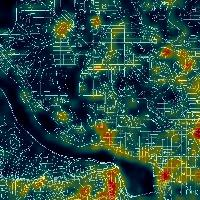

1


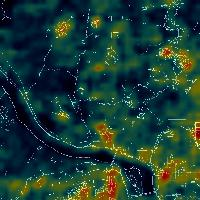

2


3


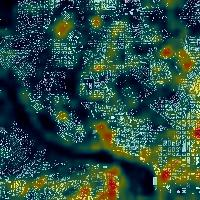

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


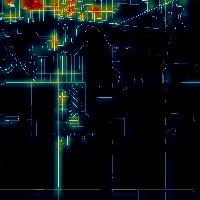

1


2


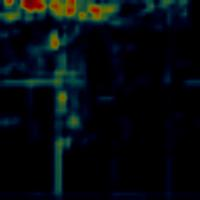

3


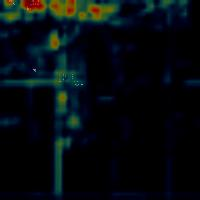

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


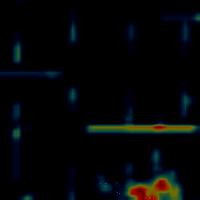

2


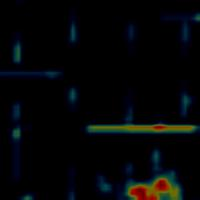

3


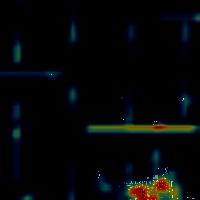

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


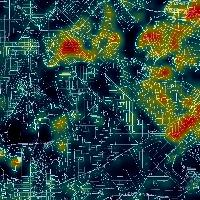

1


2


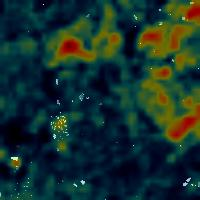

3


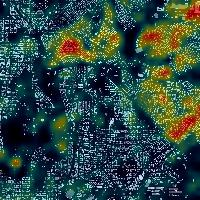

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


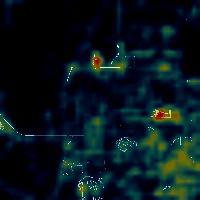

2


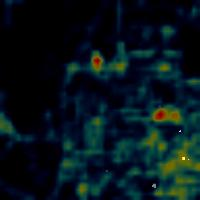

3


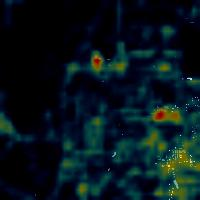

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


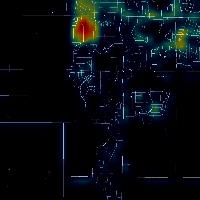

1


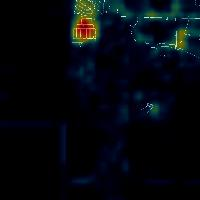

2


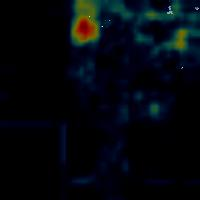

3


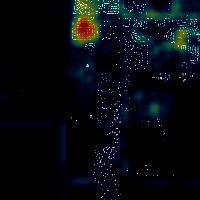

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


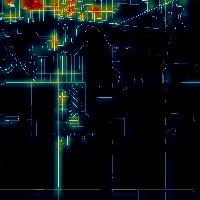

1


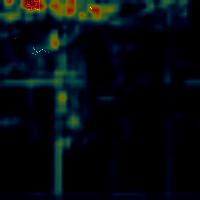

2


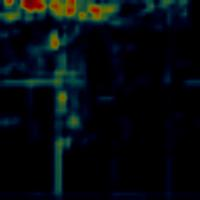

3


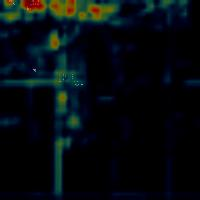

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


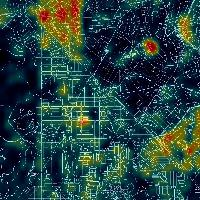

1


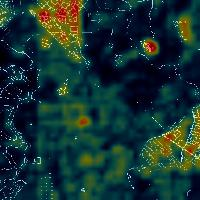

2


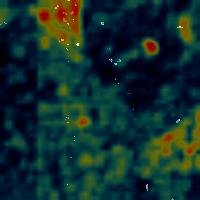

3


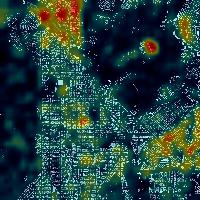

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


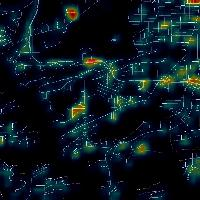

1


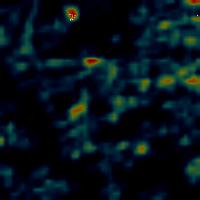

2


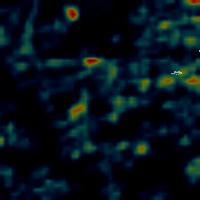

3


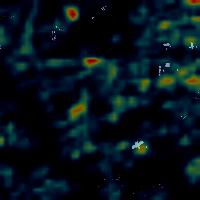

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


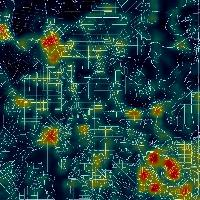

1


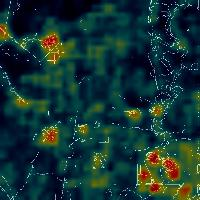

2


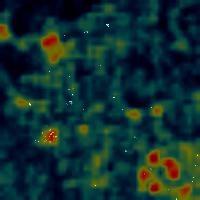

3


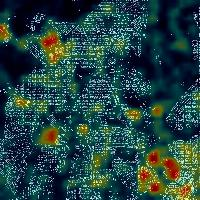

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


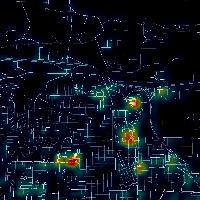

1


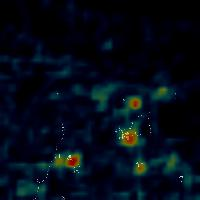

2


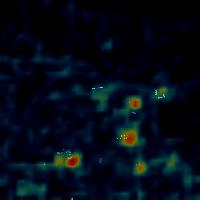

3


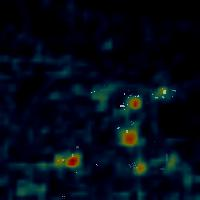

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


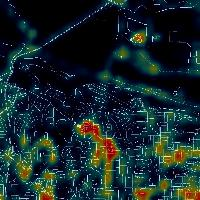

1


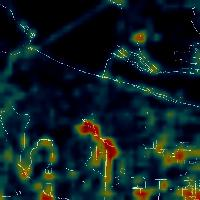

2


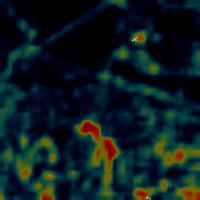

3


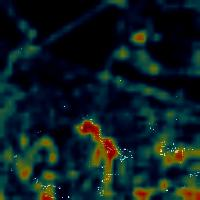

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


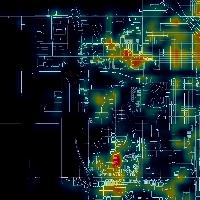

1


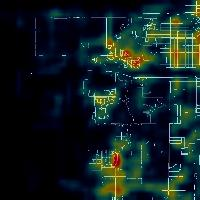

2


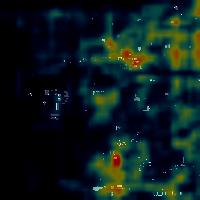

3


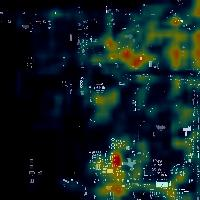

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


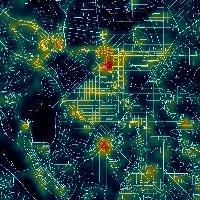

1


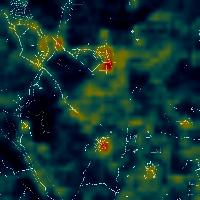

2


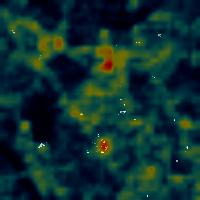

3


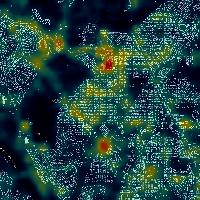

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


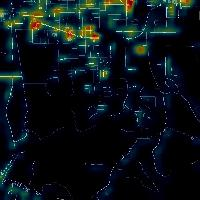

1


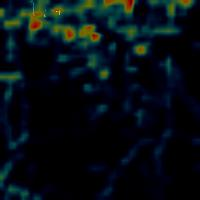

2


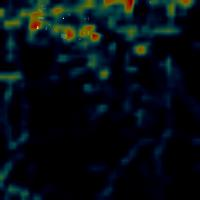

3


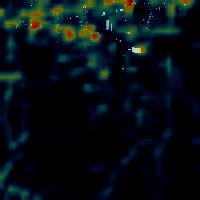

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


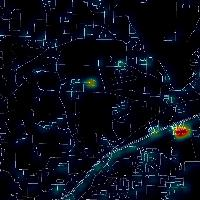

1


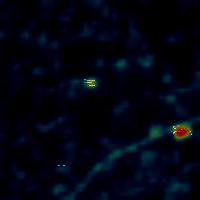

2


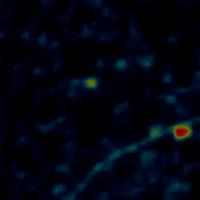

3


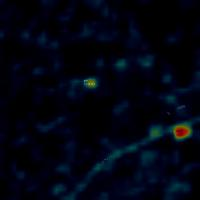

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


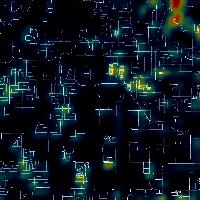

1


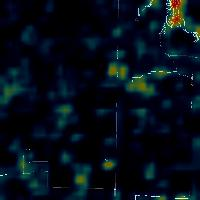

2


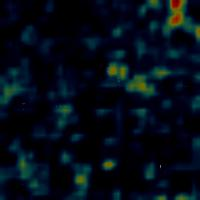

3


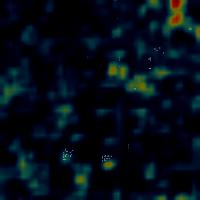

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


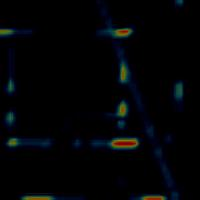

1


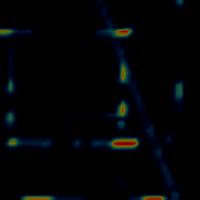

2


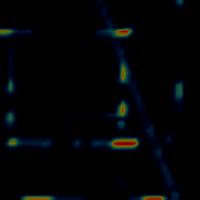

3


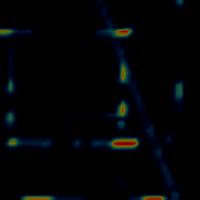

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


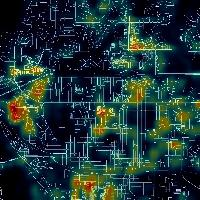

1


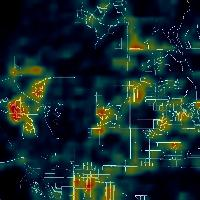

2


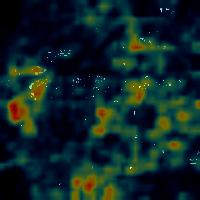

3


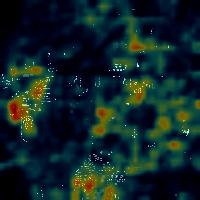

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


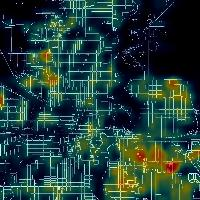

1


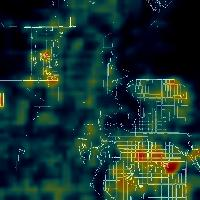

2


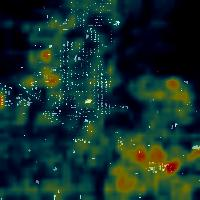

3


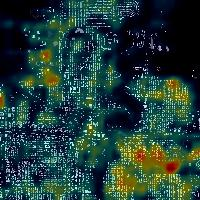

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


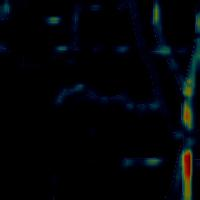

1


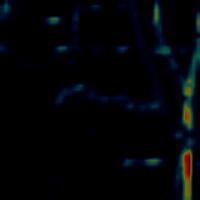

2


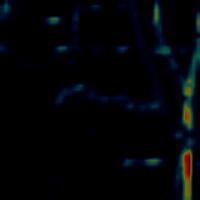

3


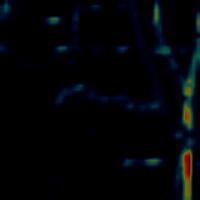

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


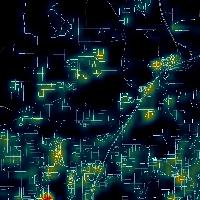

1


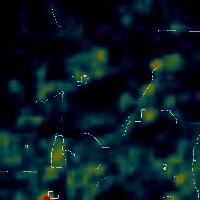

2


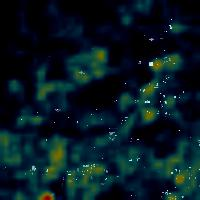

3


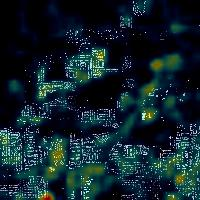

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


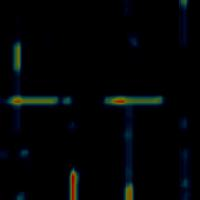

1


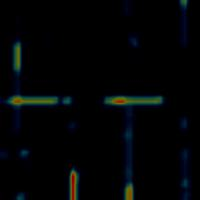

2


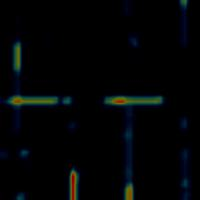

3


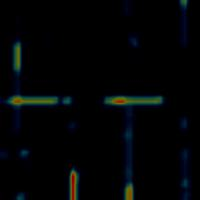

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


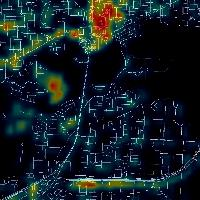

1


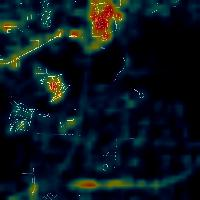

2


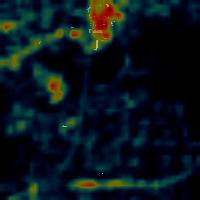

3


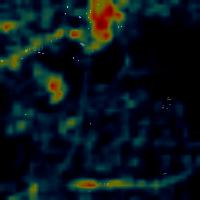

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


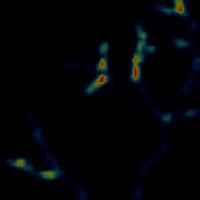

2


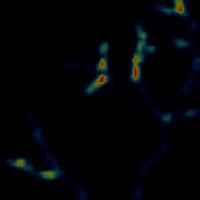

3


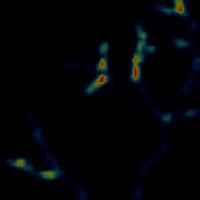

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


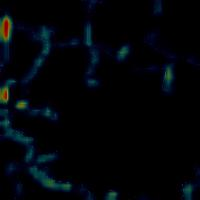

1


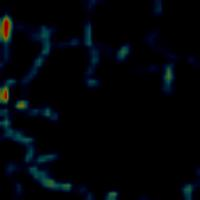

2


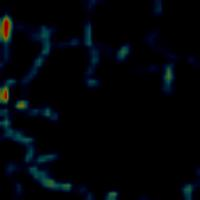

3


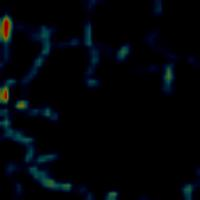

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


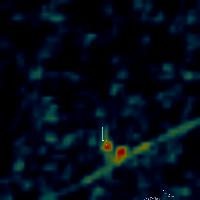

2


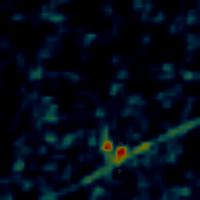

3


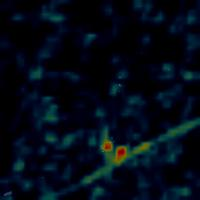

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


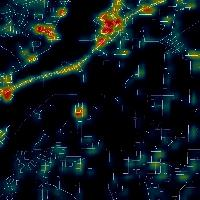

1


2


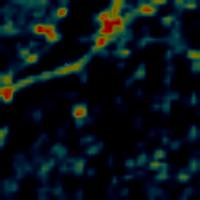

3


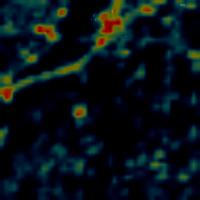

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


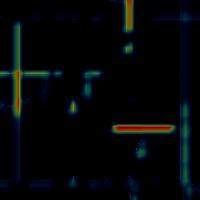

1


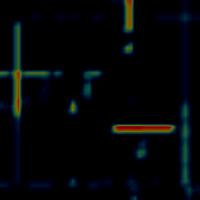

2


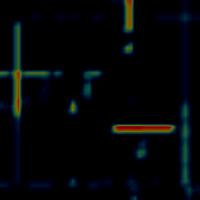

3


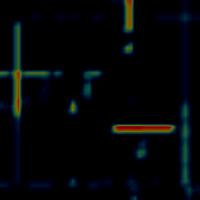

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


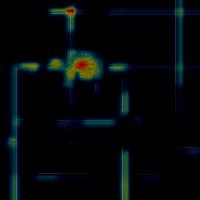

1


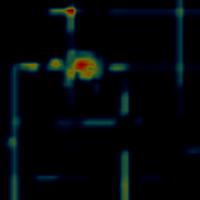

2


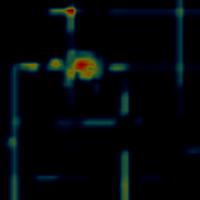

3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


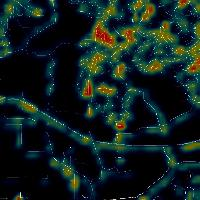

1


2


3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


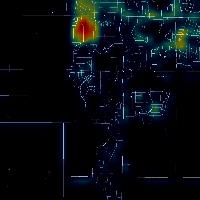

1


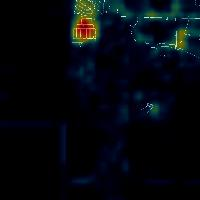

2


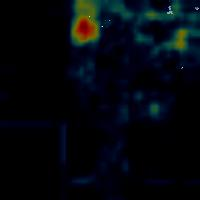

3


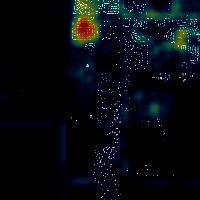

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


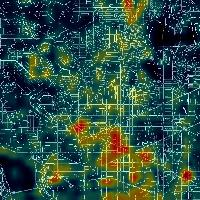

1


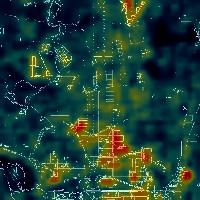

2


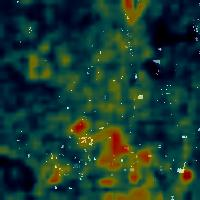

3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


2


3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


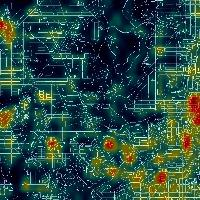

1


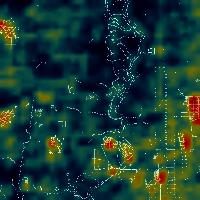

2


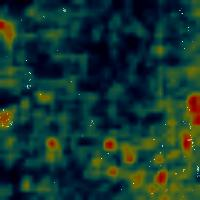

3


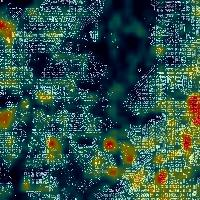

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


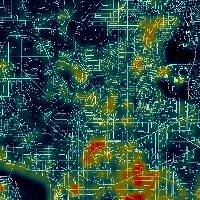

1


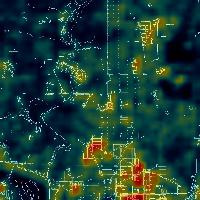

2


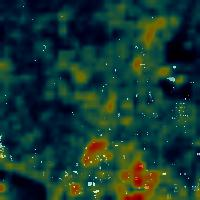

3


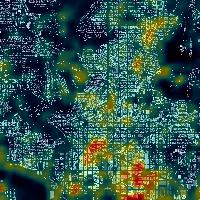

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


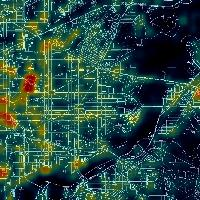

1


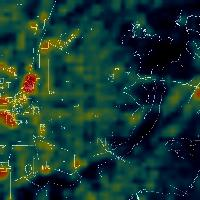

2


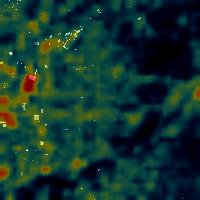

3


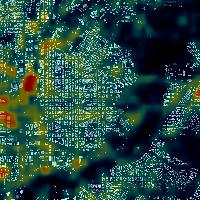

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


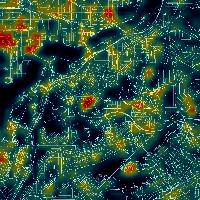

1


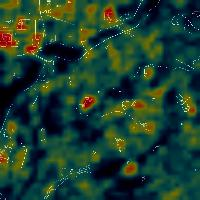

2


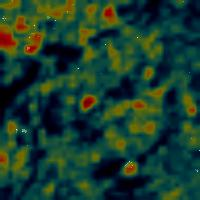

3


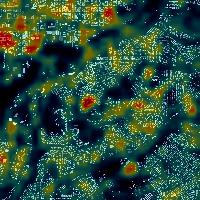

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


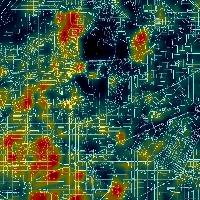

1


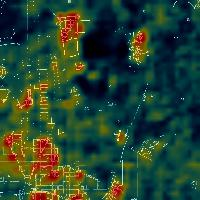

2


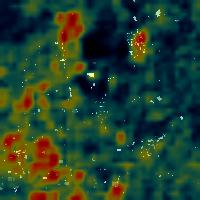

3


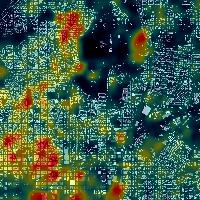

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


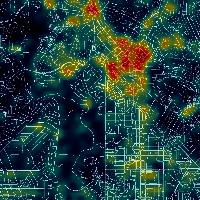

1


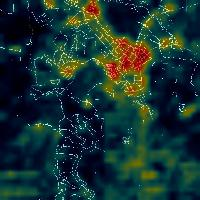

2


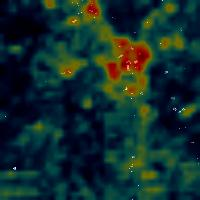

3


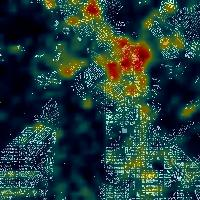

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


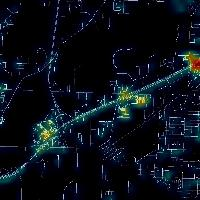

1


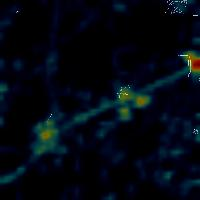

2


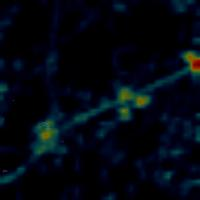

3


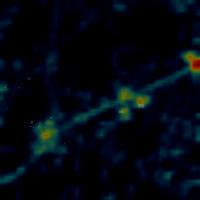

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


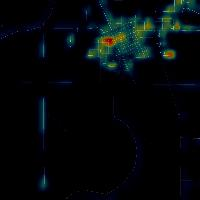

1


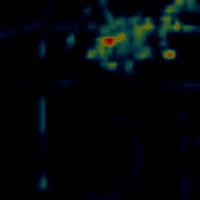

2


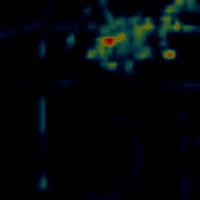

3


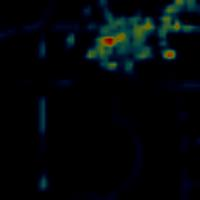

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


2


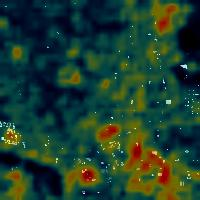

3


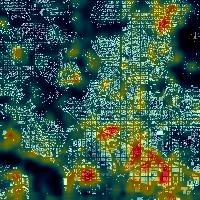

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


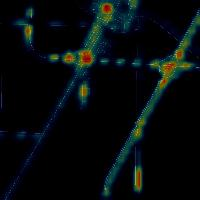

1


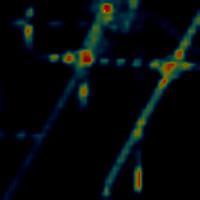

2


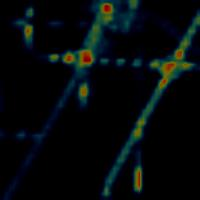

3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


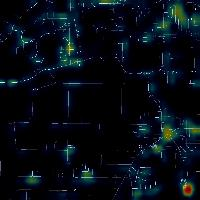

1


2


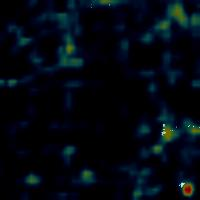

3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


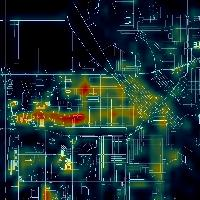

1


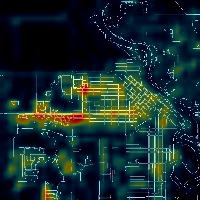

2


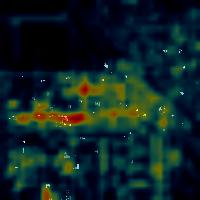

3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


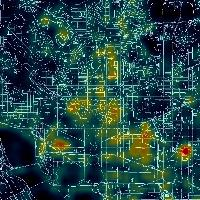

1


2


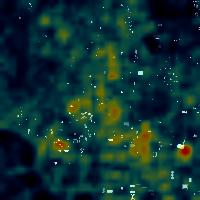

3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


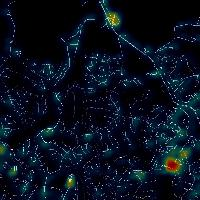

1


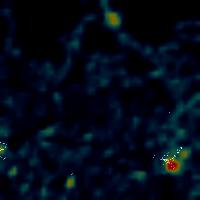

2


3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


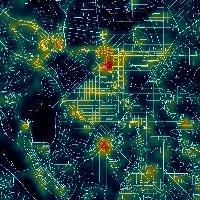

1


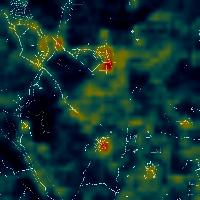

2


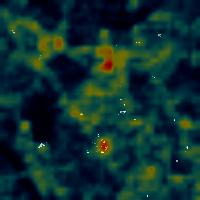

3


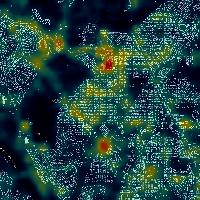

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


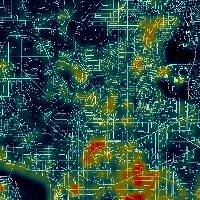

1


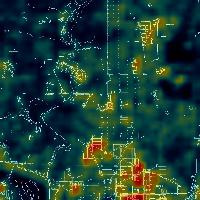

2


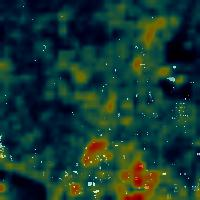

3


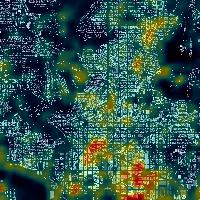

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


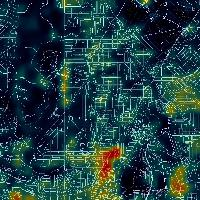

1


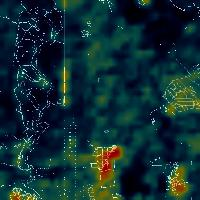

2


3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


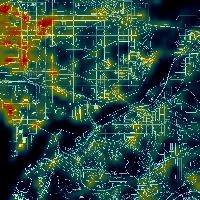

1


2


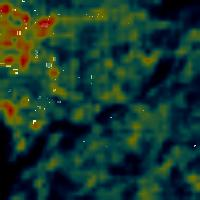

3


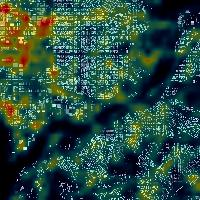

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


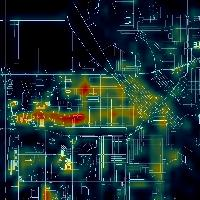

1


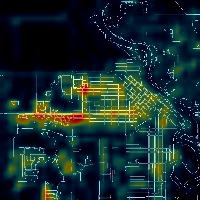

2


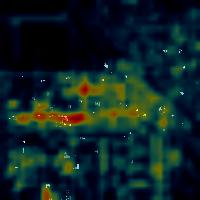

3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


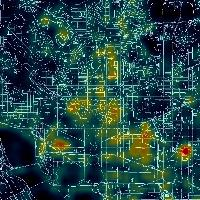

1


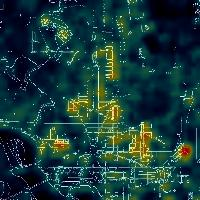

2


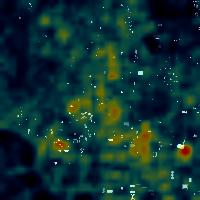

3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


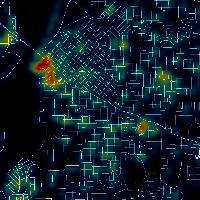

1


2


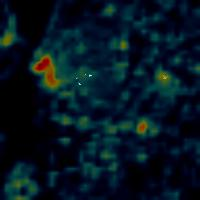

3


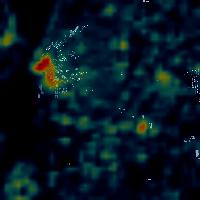

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


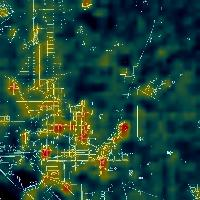

2


3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


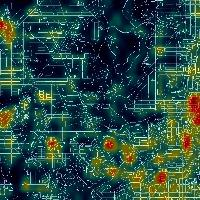

1


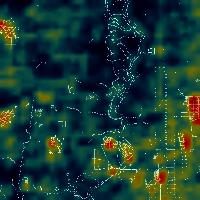

2


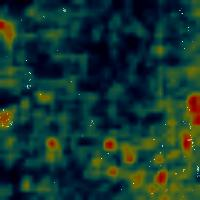

3


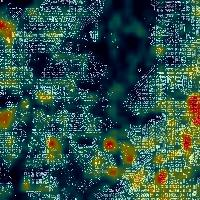

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


2


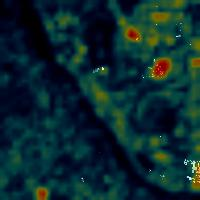

3


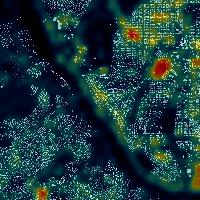

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


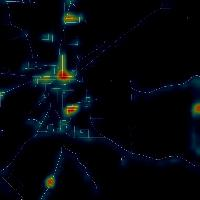

1


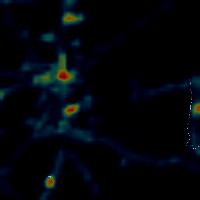

2


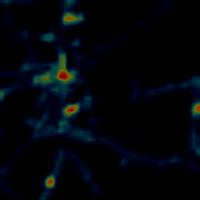

3


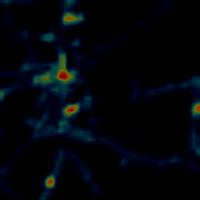

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


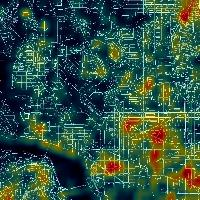

1


2


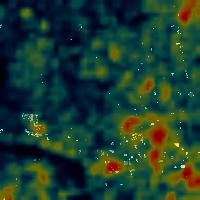

3


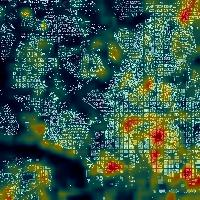

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


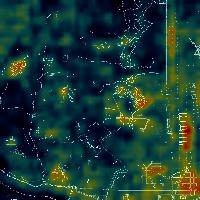

2


3


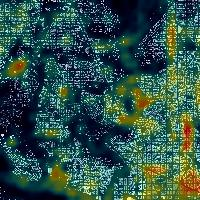

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


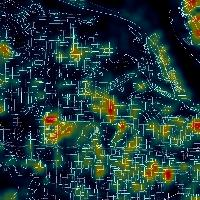

1


2


3


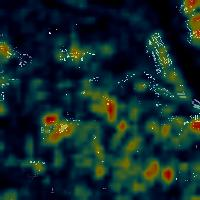

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


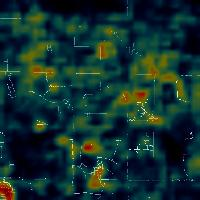

2


3


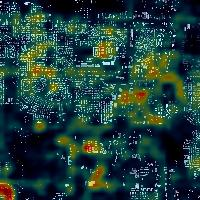

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


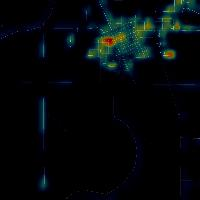

1


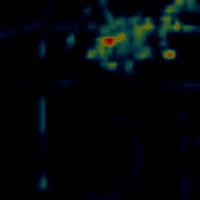

2


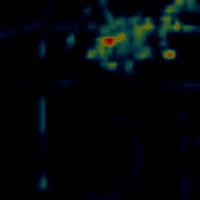

3


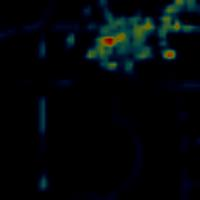

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


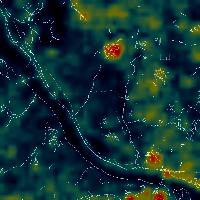

2


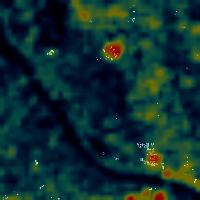

3


torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


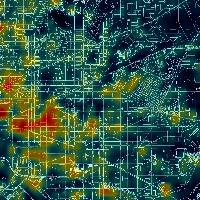

1


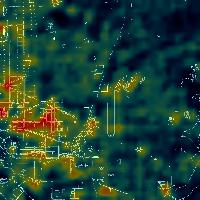

2


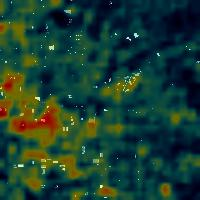

3


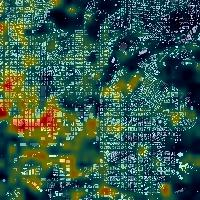

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


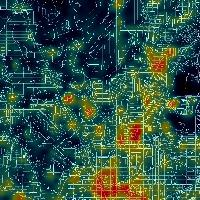

1


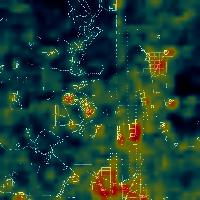

2


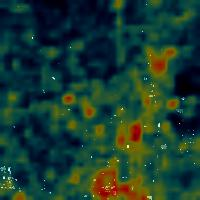

3


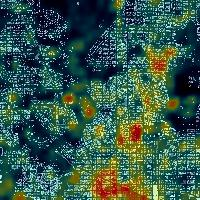

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


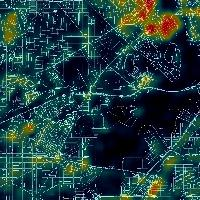

1


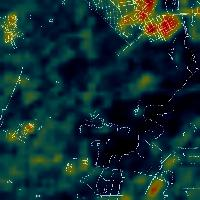

2


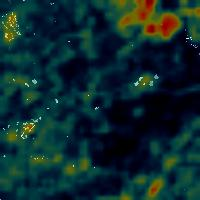

3


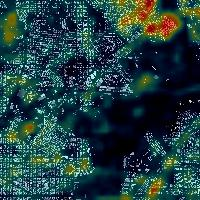

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


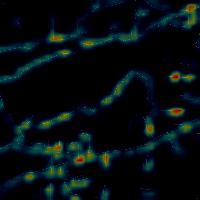

1


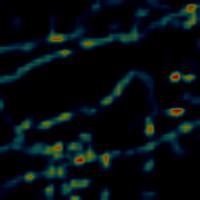

2


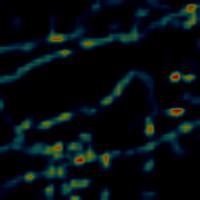

3


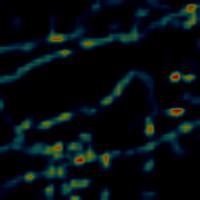

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


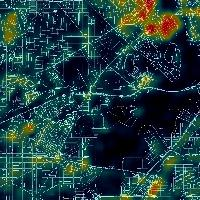

1


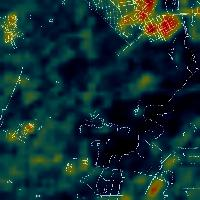

2


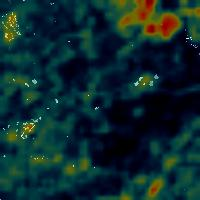

3


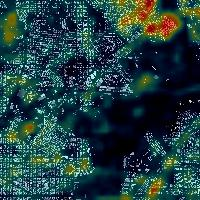

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


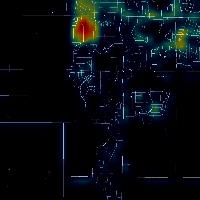

1


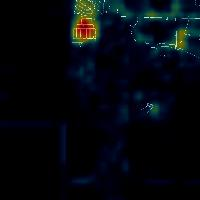

2


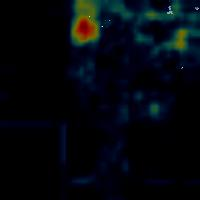

3


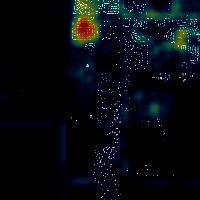

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


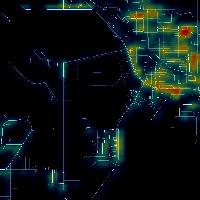

1


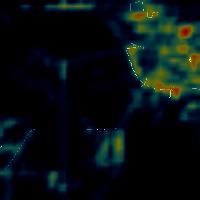

2


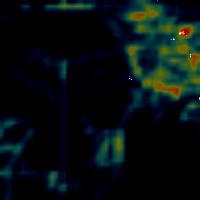

3


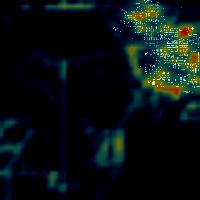

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


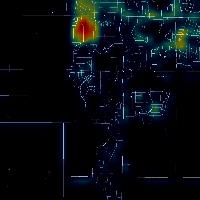

1


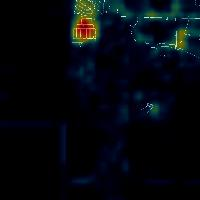

2


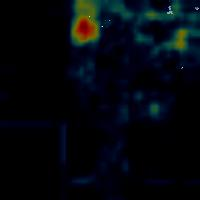

3


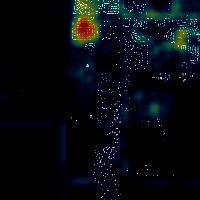

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


1


2


3


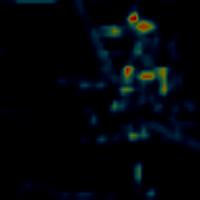

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


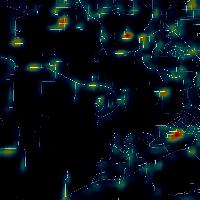

1


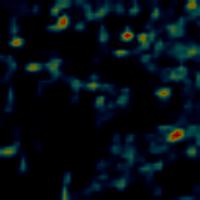

2


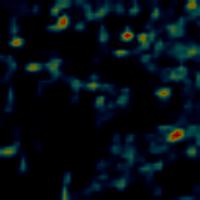

3


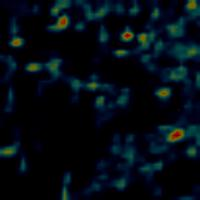

torch.Size([1, 10, 48, 48])
(4, 200, 200)
4
0


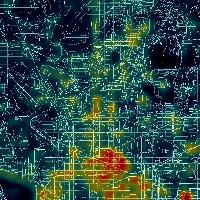

1


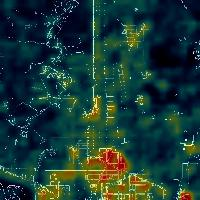

2


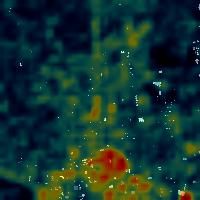

3


In [41]:
for j in range(0,100):
    sample_np = x_train_images[j]
    #torch to run through cnn
    sample_torch = torch.as_tensor(sample_np).float().unsqueeze(0)
    feat = generate_featuremap_unit(cnn_net,1,sample_torch)
    print(sample_np.shape)
    list_of_visualizations = visualize_featuremap(sample_np,feat)
    for i, elt in enumerate(list_of_visualizations):
        print(i)
        showarray(elt)